In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

(2064, 1548, 3)
(800, 1500, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

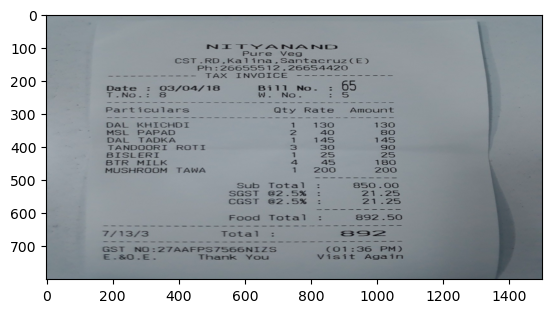

In [2]:
img_path = "C:/Users/ershi/Documents/python projects/cam scanner/bill.jpg"
img = cv2.imread(img_path)
print (img.shape)
img = cv2.resize(img , (1500, 800))
print(img.shape)

plt.imshow(img)
plt.show

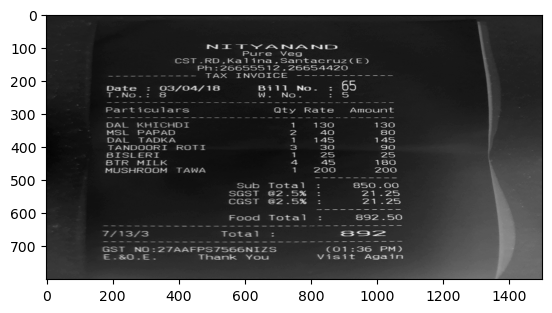

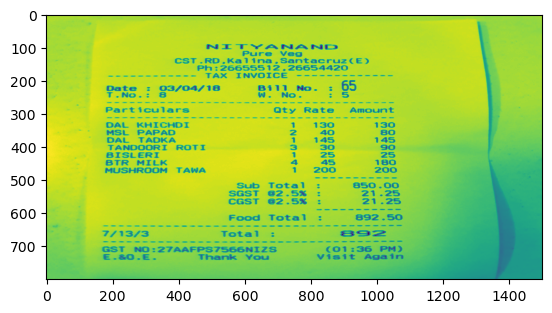

In [3]:
orig =  img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "binary")
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5) , 0)
plt.imshow(blurred)
plt.show()

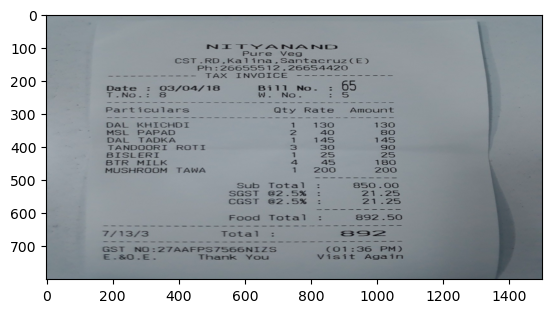

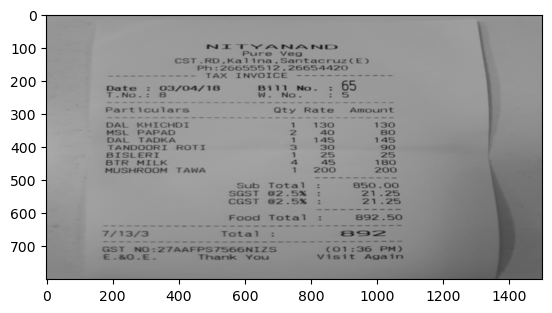

In [4]:
regen =  cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

In [5]:
regen.shape

(800, 1500, 3)

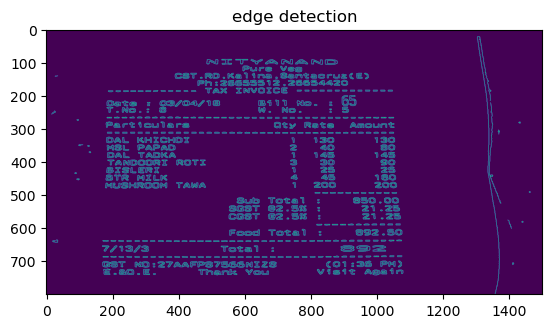

In [6]:
edge = cv2.Canny(blurred, 0, 50)
orig_edge = edge.copy()
plt.title("edge detection")
plt.imshow(orig_edge)
plt.show()

In [7]:
##comtor extraction

contours, _ = cv2.findContours(edge, cv2.RETR_LIST , cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted ( contours, reverse= True, key = cv2.contourArea)

1478


In [8]:
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    
    if len(approx) == 4 :
        target = approx
        break
        
print (target.shape)

(4, 1, 2)


In [9]:
def reorder(h):
    h = h.reshape((4,2))
    print (h)
    
    hnew = np.zeros((4,2), dtype = np.float32)
    
    add =  h.sum(axis = 1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis = 1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew

In [10]:
reorder = reorder(target)
print("*******")
print(reorder)

[[1017  352]
 [1017  355]
 [1027  355]
 [1027  352]]
*******
[[1017.  355.]
 [1027.  355.]
 [1017.  355.]
 [1027.  355.]]


In [11]:
input_representation = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [12]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans = cv2.warpPerspective(orig, M, (800,800))

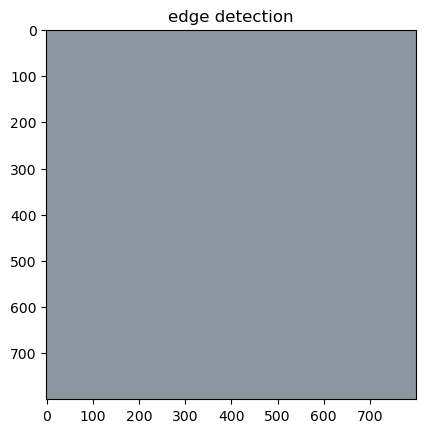

In [13]:
plt.imshow(ans)
plt.title("edge detection")
plt.show()